# Buscas supervisionadas

## Imports

In [1]:
# imports necessarios
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import time
from statistics import mean, stdev
from math import sqrt

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

## Criação do mapa e do grafo

In [2]:
# make the dict where the key is associated with his neighbors
mapa = {}
for i in range(0,60):
    for j in range(0,60):
        mapa[(i,j)] = {(i+1,j):1, (i-1,j):1, (i,j+1):1, (i,j-1):1}
        
grafo = UndirectedGraph(mapa)

## Modelagem da classe problema

In [17]:
class RobotProblem(Problem):

    """Problema para encontrar o goal saindo de uma posicao (x,y) com um robo."""

    def __init__(self, initial, goal, mapa, graph):
        Problem.__init__(self, initial, goal)
        self.mapa = mapa
        self.graph = graph

    def actions(self, actual_pos):
        """The actions at a graph node are just its neighbors."""
        neighbors = list(self.graph.get(actual_pos).keys())
        valid_actions = []
        for act in neighbors:
            if act[0] == 0 or act[0] == 60 or act[1] == 0 or act[1] == 60:
                i = 1
            elif (act[0] == 20 and (0<= act[1] <= 40)):
                i = 2
            elif (act[0] == 40 and (20<= act[1] <= 60)):
                i = 3
            else:
                valid_actions.append(act)
                
        return valid_actions

    def result(self, state, action):
        """The result of going to a neighbor is just that neighbor."""
        return action

    def path_cost(self, cost_so_far, state1, action, state2):
        return cost_so_far + 1

    def goal_test(self, state):
        if state[0] == self.goal[0] and state[1] == self.goal[1]:
            return True
        else:
            return False
    
    def heuristic_1(self, node):
        """h function is straight-line distance from a node's state to goal."""
        locs = getattr(self.graph, 'locations', None)
        if locs:
            if type(node) is str:
                return int(distance(locs[node], locs[self.goal]))

            return int(distance(locs[node.state], locs[self.goal]))
        else:
            return infinity

## Busca supervisionada A*: Heuristica 1

### Calculo do custo da busca e o caminho percorrido

In [23]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
node = astar_search(robot_problem, h=robot_problem.heuristic_1)
print("Custo da busca A* com a primeira heuristica: " + str(node.path_cost))

Custo da busca A* com a primeira heuristica: 142


In [19]:
list_nodes = []
for n in node.path():
    list_nodes.append(n.state)

In [20]:
x = []
y = []
for nod in list_nodes:
    x.append(nod[0])
    y.append(nod[1])

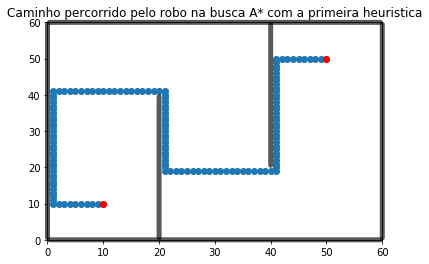

In [25]:
fig = plt.figure()
plt.xlim(0,60)
plt.ylim(0,60)
plt.title('Caminho percorrido pelo robo na busca A* com a primeira heuristica')
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(0, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(60, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(60,0), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(0,60), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(40,20), xycoords='data',
              xytext=(40, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.scatter(x,y)
plt.scatter(10,10,color='r')
plt.scatter(50,50,color='r')
plt.show()

### Calculo do tempo gasto pelo A* com inicio em (10,10) e fim em (50,50) usando a heuristica 1

In [24]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)

times = []
for i in range(0,1000):
    start = time.time()
    node = astar_search(robot_problem, h=robot_problem.heuristic_1)
    end = time.time()
    times.append(end - start)

Media do tempo gasto para a busca A* com a primeira heuristica: 0.29269154953956605
Desvio padrao do tempo gasto para a busca A* com a primeira heuristica: 0.024914598492101866
Intervalo de confiança para a busca A* com a primeira heuristica: (0.2911473267263827,0.2942357723527494)


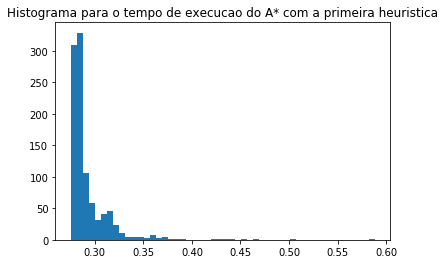

In [26]:
media_a_1 = mean(times)
desvio_a_1 = stdev(times)
intervalo_conf = '(' + str( media_a_1 - 1.96 * (desvio_a_1 / (len(times)) ** (1/2)) ) + ',' + str( media_a_1 + 1.96 * (desvio_a_1 / (len(times)) ** (1/2)) ) + ')'
print("Media do tempo gasto para a busca A* com a primeira heuristica: " + str(media_a_1))
print("Desvio padrao do tempo gasto para a busca A* com a primeira heuristica: " + str(desvio_a_1))
print("Intervalo de confiança para a busca A* com a primeira heuristica: " + intervalo_conf)
fig = plt.figure()
plt.hist(times,bins=50)
plt.title('Histograma para o tempo de execucao do A* com a primeira heuristica')
plt.show()

### Projecao da relacao entre distancia em linha reta e tempo para o A* com a primeira heuristica

In [27]:
goal_pos = (50,50)
x = []
y = []
for i in range(5,50):
    for j in range(5,50):
        if i != 20 and i != 40:
            init_pos = (i,i)
            distancia_linha_reta = sqrt( (goal_pos[0] - init_pos[0]) ** 2 + (goal_pos[1] - init_pos[1]) ** 2)
            robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
            start = time.time()
            node = astar_search(robot_problem, h=robot_problem.heuristic_1)
            end = time.time()
            x.append(distancia_linha_reta)
            y.append(end - start)

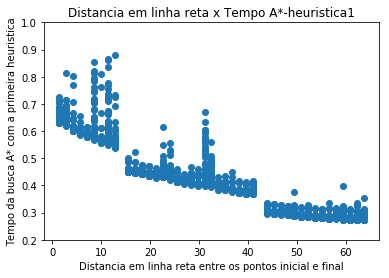

In [31]:
fig = plt.figure()
plt.scatter(x,y)
plt.ylim(0.2, 1.0)
plt.title("Distancia em linha reta x Tempo A*-heuristica1")
plt.xlabel("Distancia em linha reta entre os pontos inicial e final")
plt.ylabel("Tempo da busca A* com a primeira heuristica")
plt.show()